In [ ]:
%matplotlib inline
import cmlreaders as cml
import numpy as np
import seaborn as sns
import pandas as pd
import sys
sys.path.append('~/pybeh_pd')
import pybeh_pd as pb

In [2]:
all_repfr1_events = cml.CMLReader.load_events(experiments=["ltpRepFR"])

In [5]:
pb_min_crp = all_repfr1_events.groupby('subject').apply(pb.pd_min_crp, 
                                itemno_column='item_num', max_n_reps=3).reset_index()

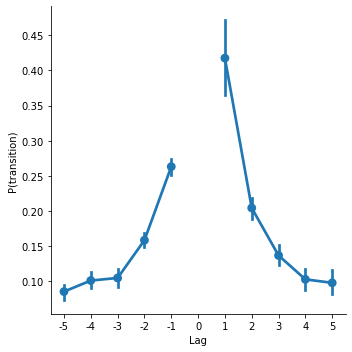

In [6]:
g = sns.catplot(x='lag', y='prob', kind='point', 
                  data=pb_min_crp.query('lag <= 5 and lag >= -5'))
g.set(xlabel='Lag', ylabel='P(transition)')